In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#df_scores = pd.read_csv("../data/dataverse/dv_rating.csv", index_col=0)
df = pd.read_csv("../data/dataverse/dv_scores.csv", index_col=0)
df_scores = df.iloc[:,-2:]

df.head()

,doi,filename,year,readability_score
0,doi:10.7910/DVN/WCTILJ,Script.R,2020,6.053857
1,doi:10.7910/DVN/O3ETO9,jose-galdino-script-tf-ad-ufpe-2018.R,2019,6.274306
2,doi:10.7910/DVN/TKTN5J,0_Run It All.R,2017,6.726643
3,doi:10.7910/DVN/TKTN5J,1_Prep the data.R,2017,5.907666
4,doi:10.7910/DVN/TKTN5J,2_Run eBal.R,2017,5.659895


In [24]:
print(df['readability_score'].max())
print(df['readability_score'].min())

7.100544705325084
3.2068965517241383


In [25]:
# show number of files and the mean score per year
years_info = df_scores.groupby(['year']).count()
years_info['avg score'] = df_scores.groupby(['year']).mean()
years_info = years_info.rename(columns={"readability_score": "# of files"})
years_info

,# of files,avg score
year,,
2010,1,5.818724
2014,3,5.686411
2015,108,5.753437
2016,642,5.830964
2017,571,5.807854
2018,801,5.814034
2019,1018,5.822070
2020,573,5.923384


# SNS Style

In [26]:
sns.set_context("paper", font_scale=1)
sns.set_style('whitegrid')
sns.set_style({'font.family': 'Times New Roman'})

# Plot Distribution of Dataverse Scores

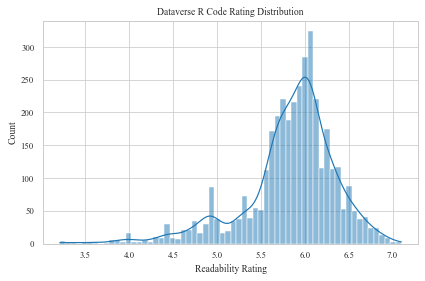

In [36]:
#fig = plt.figure(figsize=(3.48,2.3))
plt.figure(figsize=(6,4))
plt.title("Dataverse R Code Rating Distribution") 
plt.xlabel('Readability Rating')  
plt.ylabel('Count')
sns.histplot(x = df_scores['readability_score'].values, kde = True)
plt.tight_layout()
plt.show()

# Heatmap of Scores Per Year

In [42]:
# create df with years as columns
df_years = df_scores.pivot(columns='year')['readability_score']

arr = []
for column in df_years:
    temp = df_years[column].values
    arr = temp[~(np.isnan(temp))]
    df_years[column] = pd.Series(np.sort(arr))
    
df_years = df_years.dropna(how='all')
df_years.head()

year,2010,2014,2015,2016,2017,2018,2019,2020
0,5.818724,5.249090,3.471264,3.206897,3.265486,3.937500,3.270608,3.497388
1,NaN,5.903476,3.717172,3.213106,3.821402,4.000000,3.575758,3.880208
2,NaN,5.906667,4.178253,3.256439,3.834171,4.000000,3.622896,4.000000
3,NaN,NaN,4.392639,3.391327,3.923611,4.145833,3.830303,4.000000
4,NaN,NaN,4.454545,3.561865,4.000000,4.164198,3.858586,4.000000


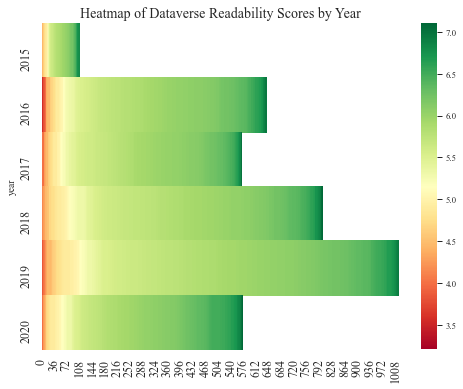

In [53]:
#fig = plt.figure(figsize=(3.48,2.3))
plt.figure(figsize=(8,6))
plt.title("Heatmap of Dataverse Readability Scores by Year", fontsize = 14) 
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

sns.heatmap((df_years.iloc[:, 2:]).transpose(), cmap="RdYlGn")
plt.show()

# Rating Distribution Per Year at Dataverse

/Users/ethanhung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


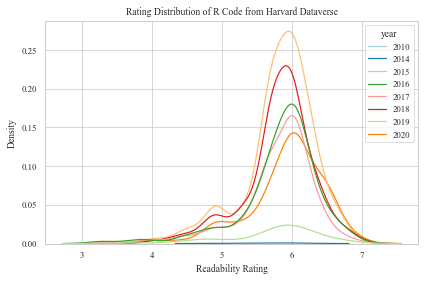

In [48]:
#fig = plt.figure(figsize=(3.48,2.3))
fig = plt.figure(figsize=(6,4))

sns.kdeplot(data = df, x='readability_score', palette='Paired', hue='year') 
#sns.histplot(data = df, x='readability_score', palette='Paired', hue='year') 
plt.title("Rating Distribution of R Code from Harvard Dataverse") #, fontsize=16) 
plt.xlabel('Readability Rating') #,fontsize = 8)  

#ax.set(xlabel='Sharing Mode')\n",
#plt.xticks(rotat
plt.tight_layout()
plt.savefig('rating-hist3.pdf', pdi=100, bbox_inches='tight')